### Henry Carpenter - Final Project, Part 3, Scratch:

In [1]:
#  Loading in the relevant packages

import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
#  Loading in the files that weren't too large to remain single files
listings_df = pd.read_csv('./listings.csv')
neighbourhoods_df = pd.read_csv('./neighbourhoods.csv')
reviews_df = pd.read_csv('./reviews.csv')

In [4]:
#  Loading in the files that had to be split into several pieces
listings_1_df = pd.read_csv('./listings_1.csv')
listings_2_df = pd.read_csv('./listings_2.csv')
listings_3_df = pd.read_csv('./listings_3.csv')
listings_4_df = pd.read_csv('./listings_4.csv')

In [5]:
#  Loading in the files that had to be split into several pieces
calendar1_df = pd.read_csv('./calendar1.csv')
calendar2_df = pd.read_csv('./calendar2.csv')
calendar3_df = pd.read_csv('./calendar3.csv')
calendar4_df = pd.read_csv('./calendar4.csv')

In [6]:
#  Loading in the files that had to be split into several pieces
reviews_1_df = pd.read_csv('./reviews_1.csv')
reviews_2_df = pd.read_csv('./reviews_2.csv')
reviews_3_df = pd.read_csv('./reviews_3.csv')
reviews_4_df = pd.read_csv('./reviews_4.csv')
reviews_5_df = pd.read_csv('./reviews_5.csv')
reviews_6_df = pd.read_csv('./reviews_6.csv')

In [7]:
#  Appending the several smaller files to recreate the inital larger file
reviews_summary_df = reviews_1_df.append(reviews_2_df.append(reviews_3_df.append(reviews_4_df.append(reviews_5_df.append(reviews_6_df))))).drop(columns=['Unnamed: 0'], axis='columns')
listings_summary_df = listings_1_df.append(listings_2_df).drop(columns=['Unnamed: 0'], axis='columns')
calendar_df = calendar1_df.append(calendar2_df.append(calendar3_df.append(calendar4_df))).drop(columns=['Unnamed: 0'], axis='columns')

In [8]:
# Turning the string 'price' field into a float

def parse_obj_float(val):
    new_val = ''
    for character in val:
        if character in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']:
            new_val = new_val + character
    if len(new_val) == 0:
        return
    else:
        return float(new_val)

In [9]:
calendar_df['price'] = calendar_df['price'].apply(parse_obj_float)

In [10]:
# calendar_df.drop(labels=['date', 'available', 'month', 'year', 'day'], axis='columns', inplace=True)
calendar_df.drop(labels=['date', 'available'], axis='columns', inplace=True)

In [11]:
#  Dropping features I decided initially seemed unhelful (wih the help of heatmaps and correlations) and creating dummy variables for others
labels_to_drop_listings = ['minimum_nights', 'maximum_nights', 'host_is_superhost', 'price', 'is_business_travel_ready', 'require_guest_phone_verification', 'host_id', 'has_availability', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'extra_people', 'guests_included', 'cleaning_fee', 'security_deposit','monthly_price', 'weekly_price', 'square_feet', 'amenities', 'property_type', 'latitude', 'longitude', 'is_location_exact', 'zipcode', 'market', 'city', 'state', 'smart_location', 'country_code', 'country', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'calendar_last_scraped', 'first_review', 'last_review', 'experiences_offered', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'requires_license', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'require_guest_profile_picture', 'calculated_host_listings_count']
listings_summary_df.drop(labels=labels_to_drop_listings, axis='columns', inplace=True)
listings_summary_df = pd.get_dummies(listings_summary_df, columns=['cancellation_policy', 'bed_type', 'room_type', 'neighbourhood_group_cleansed'], drop_first=True)

In [12]:
# #  Converting boolean values into integer
listings_summary_df.loc[:, ['instant_bookable']] = (listings_summary_df.loc[:, ['instant_bookable']] == 'f')
listings_summary_df.loc[:, ['instant_bookable']] = listings_summary_df.loc[:, ['instant_bookable']].astype(int)

In [13]:
#  Merging the calendar dataframe with the listings one to match up only on available days
#  I initially included features like 'month', 'is_weekend', 'days_from_beginning', etc but they turned out to have effectively no correlation with price at all
large_df = pd.merge(calendar_df, listings_summary_df, how='left', left_on = 'listing_id', right_on = 'id')
large_df.drop(labels=['id'], axis='columns', inplace=True)

In [14]:
#  Drop unusable rows
large_df = large_df.dropna()
large_df = large_df.loc[large_df.loc[:, 'price'] < 800, :]
X = large_df.drop('price', axis='columns')
y = large_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# I realized I had been using the price of an airbnb on one day to predict the price on the next, so here I dropped duplicate rows on 'listing_id' to prevent that
# Sadly, this does remove any possibility of using dates, as now I only have a single datapoint per host. It also substantially cut down on the size of the set

large_df_no_dupes = large_df.drop_duplicates(subset='listing_id')
X_no_dupes = large_df_no_dupes.drop('price', axis='columns')
y_no_dupes = large_df_no_dupes.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X_no_dupes, y_no_dupes)

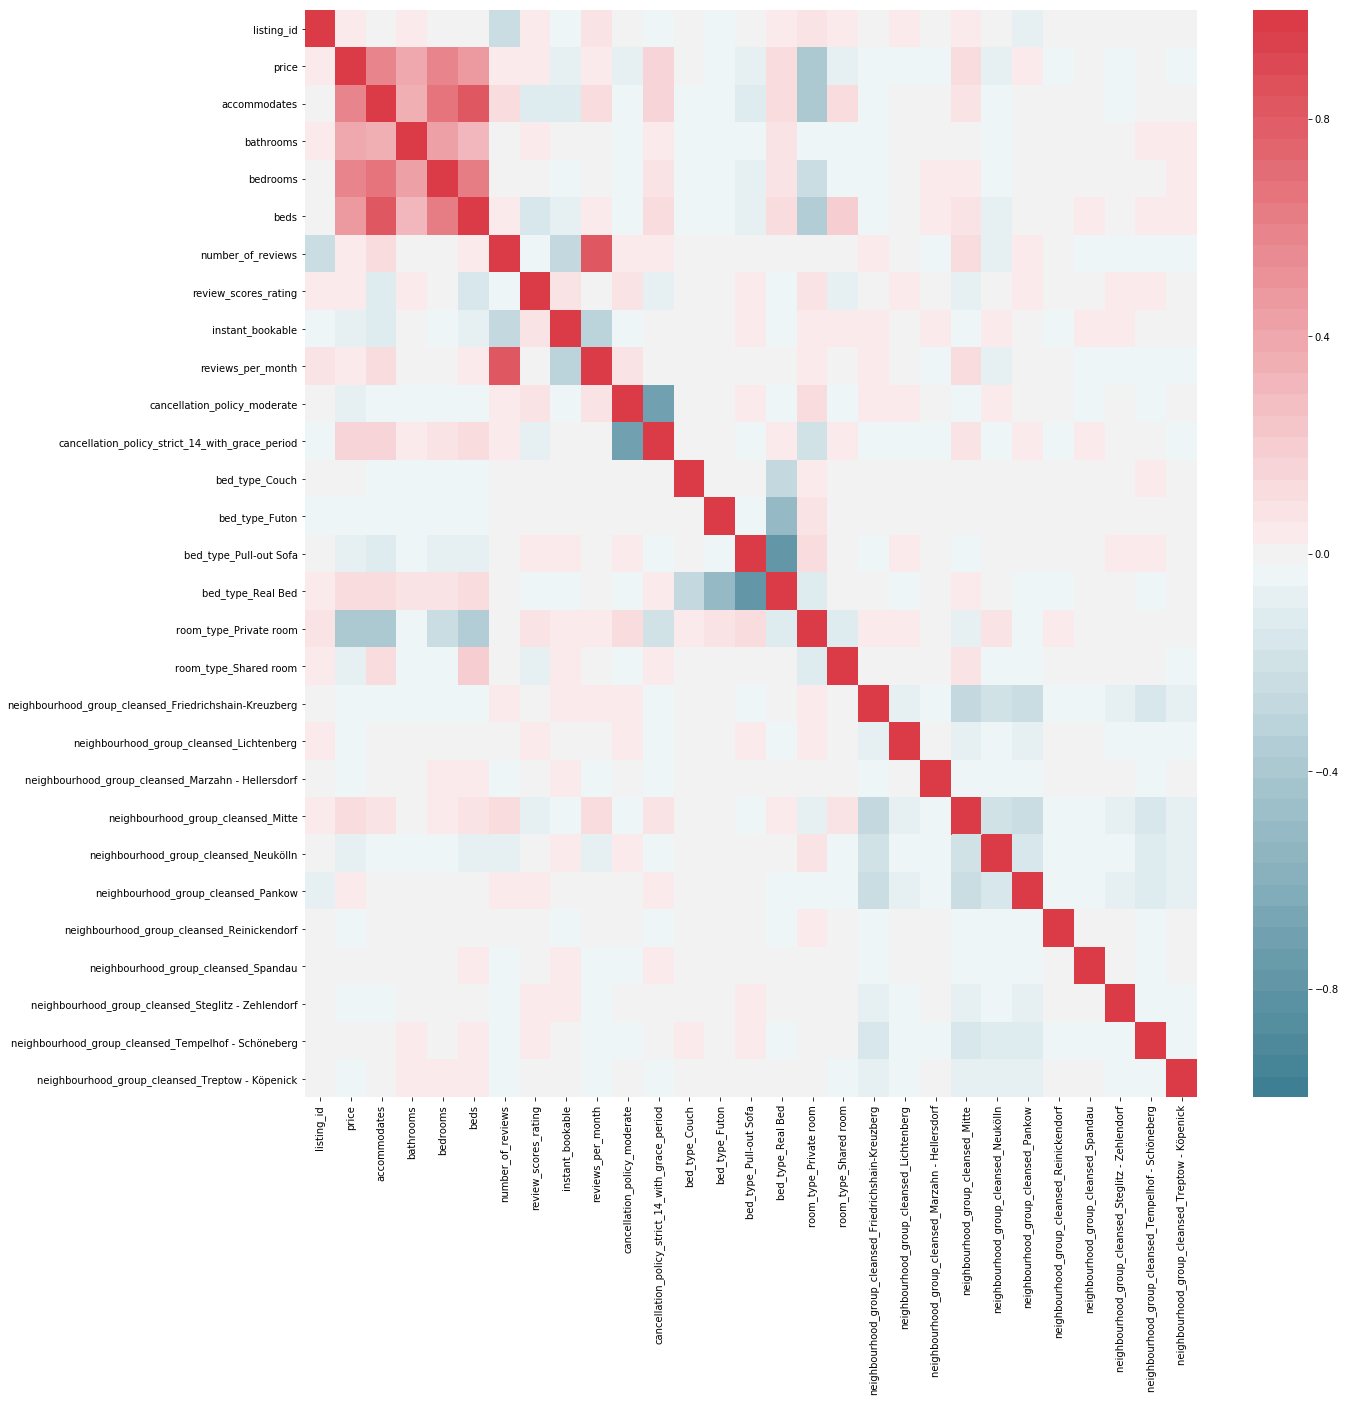

In [16]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(large_df_no_dupes.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=51)
           )

In [17]:
#  10-fold cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
scoring = ['r2', 'neg_mean_squared_error']
lr_bnb_no_dupes = LinearRegression()
kf = KFold(10, shuffle=True)
lr_grid_no_dupes = GridSearchCV(estimator=lr_bnb_no_dupes, param_grid={}, scoring=scoring, refit='r2', cv=kf, return_train_score=True)

#  Using RMSE and R^2 as my success metrics
lr_grid_no_dupes.fit(X_no_dupes,y_no_dupes)
results = lr_grid_no_dupes.cv_results_
print('Mean test RMSE: ', np.sqrt(-1*results['mean_test_neg_mean_squared_error']))
print('Mean train RMSE: ', np.sqrt(-1*results['mean_train_neg_mean_squared_error']))
print('Mean test R^2: ', results['mean_test_r2'])
print('Mean train R^2: ', results['mean_train_r2'])

Mean test RMSE:  [41.36491876]
Mean train RMSE:  [41.01337925]
Mean test R^2:  [0.49787474]
Mean train R^2:  [0.50700327]


In [18]:
#  10-fold cross-validation
#  Testing different max_depths and n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

max_depth_range = range(1, 21)
estimators = range(50, 501, 50)
scoring = ['r2', 'neg_mean_squared_error']
rfr_no_dupes = RandomForestRegressor(n_jobs=6)
kf = KFold(5, shuffle=True)
rfr_grid_no_dupes = GridSearchCV(estimator=rfr_no_dupes, param_grid={'max_depth': max_depth_range, 'n_estimators': estimators}, scoring=scoring, refit='r2', cv=kf, return_train_score=True, verbose=1)

#  Using RMSE and R^2 as my success metrics
rfr_grid_no_dupes.fit(X_no_dupes,y_no_dupes)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 21.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=6,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 21), 'n_estimators': range(50, 501, 50)},
       pre_dispatch='2*n_jobs', refit='r2', return_train_score=True,
       scoring=['r2', 'neg_mean_squared_error'], verbose=1)

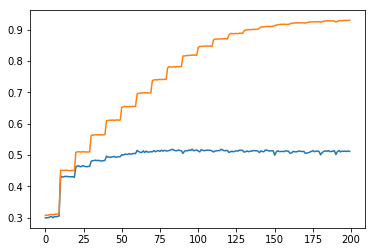

In [19]:
#  Plotting to see optimal n_estimators and max_depth
#  It looks to me like a max depth of 3 is probably the best tradeoff between bias and variance
#  It also looks like n_estimators really doesn't matter much at all. I'll just be setting that to 200

test_scores_no_dupes_testing_params = pd.DataFrame(rfr_grid_no_dupes.cv_results_).loc[:, ['mean_test_r2']]
train_scores_no_dupes_testing_params = pd.DataFrame(rfr_grid_no_dupes.cv_results_).loc[:, ['mean_train_r2']]
plt.plot(test_scores_no_dupes_testing_params.index, test_scores_no_dupes_testing_params)
plt.plot(train_scores_no_dupes_testing_params.index, train_scores_no_dupes_testing_params)
plt.show();

In [20]:
#  10-fold cross-validation for RFR for real
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

scoring = ['r2', 'neg_mean_squared_error']
rfr_no_dupes = RandomForestRegressor(n_estimators=200, max_depth=3, n_jobs=6)
kf = KFold(10, shuffle=True)
rfr_grid_no_dupes = GridSearchCV(estimator=rfr_no_dupes, param_grid={}, scoring=scoring, refit='r2', cv=kf, return_train_score=True, verbose=1)

#  Using RMSE and R^2 as my success metrics
rfr_grid_no_dupes.fit(X_no_dupes,y_no_dupes)
results = rfr_grid_no_dupes.cv_results_
print('Mean test RMSE: ', np.sqrt(-1*results['mean_test_neg_mean_squared_error']))
print('Mean train RMSE: ', np.sqrt(-1*results['mean_train_neg_mean_squared_error']))
print('Mean test R^2: ', results['mean_test_r2'])
print('Mean train R^2: ', results['mean_train_r2'])

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


Mean test RMSE:  [42.81242697]
Mean train RMSE:  [41.02751467]
Mean test R^2:  [0.46195329]
Mean train R^2:  [0.50668186]


In [21]:
#  Doing some very basic ensembling. Just averaging the predictions between the linear regressor and the random forest regressor
rfr_pred_no_dupes = rfr_grid_no_dupes.predict(X_no_dupes)
lr_pred_no_dupes = lr_grid_no_dupes.predict(X_no_dupes)
avg_pred = (lr_pred_no_dupes + rfr_pred_no_dupes)/2

In [53]:
#  Getting results from the ensembled predictions
#  It is an improvement over both the linear regressor and also the RFR, which is nice to see
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_no_dupes, avg_pred)))
print('R^2:', metrics.r2_score(y_no_dupes, avg_pred))

RMSE: 40.18167212891308
R^2: 0.5267978080964395


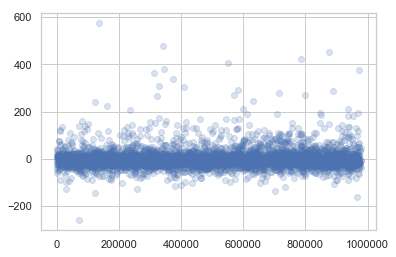

In [51]:
#  A plot of the prediction's residuals. It is mildly skew right, but it's normal enough to satisfy me. 
#  It's natural for the residual to skew a bit to the high side, I think, given the nature of prices
residuals = y_no_dupes - avg_pred
ax = plt.scatter(x=y_no_dupes.index, y=residuals, alpha=0.2)

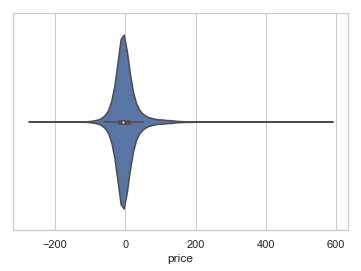

In [52]:
#  Displaying the residual again, just differently
sns.set(style="whitegrid")
sns.violinplot(x=residuals, scale='width');